In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download, find_latest, is_msoa_data_ready
from msoa_composite import check_path
from phe import plot_summary, read_csv, load_population, vaccination_dashboard
import requests

In [2]:
release=None

In [3]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-01-10,2021-01-07,United Kingdom,K02000001,42066,NaN,721.0,619941.0
1,2021-01-10,2021-01-06,United Kingdom,K02000001,54732,NaN,771.0,557441.0
2,2021-01-10,2021-01-05,United Kingdom,K02000001,63916,4066.0,753.0,498624.0
3,2021-01-10,2021-01-04,United Kingdom,K02000001,75593,3866.0,767.0,464611.0
4,2021-01-10,2021-01-03,United Kingdom,K02000001,55034,3605.0,667.0,428770.0
...,...,...,...,...,...,...,...,...
339,2021-01-10,2020-02-03,United Kingdom,K02000001,0,NaN,NaN,NaN
340,2021-01-10,2020-02-02,United Kingdom,K02000001,0,NaN,NaN,NaN
341,2021-01-10,2020-02-01,United Kingdom,K02000001,1,NaN,NaN,NaN
342,2021-01-10,2020-01-31,United Kingdom,K02000001,1,NaN,NaN,NaN


In [4]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-01-10.csv')

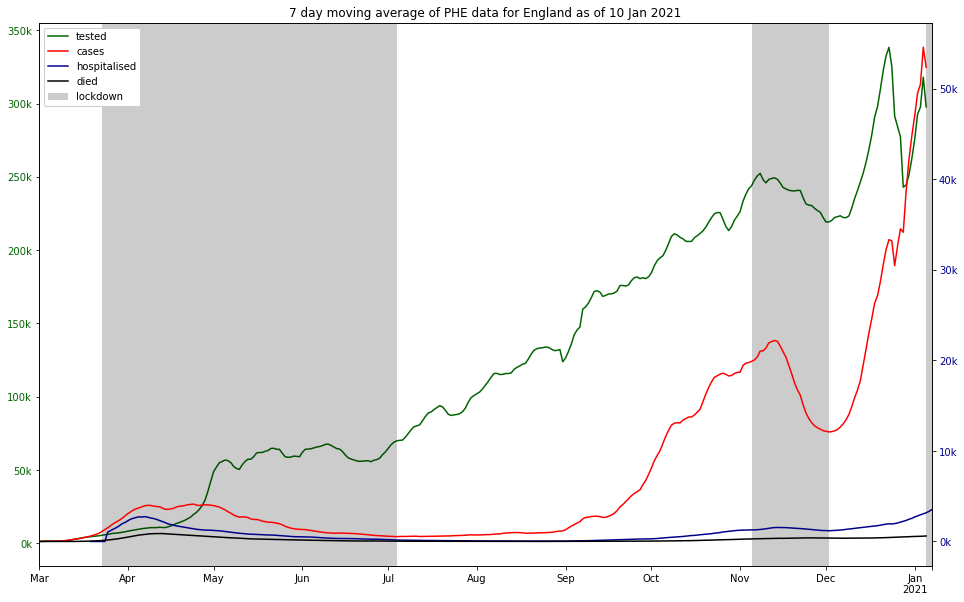

In [5]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [6]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-01-10.csv')

In [5]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-01-12.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,Wales,W92000004,25,49403,49378,3152879,0.000793,1.566124,98.433083
1,England,E92000001,19981,1092885,1072904,56286961,0.035498,1.906132,98.058369
2,Scotland,S92000003,36,113459,113423,5463300,0.000659,2.076090,97.923252
3,Northern Ireland,N92000002,1271,40685,39414,1893667,0.067118,2.081359,97.851523


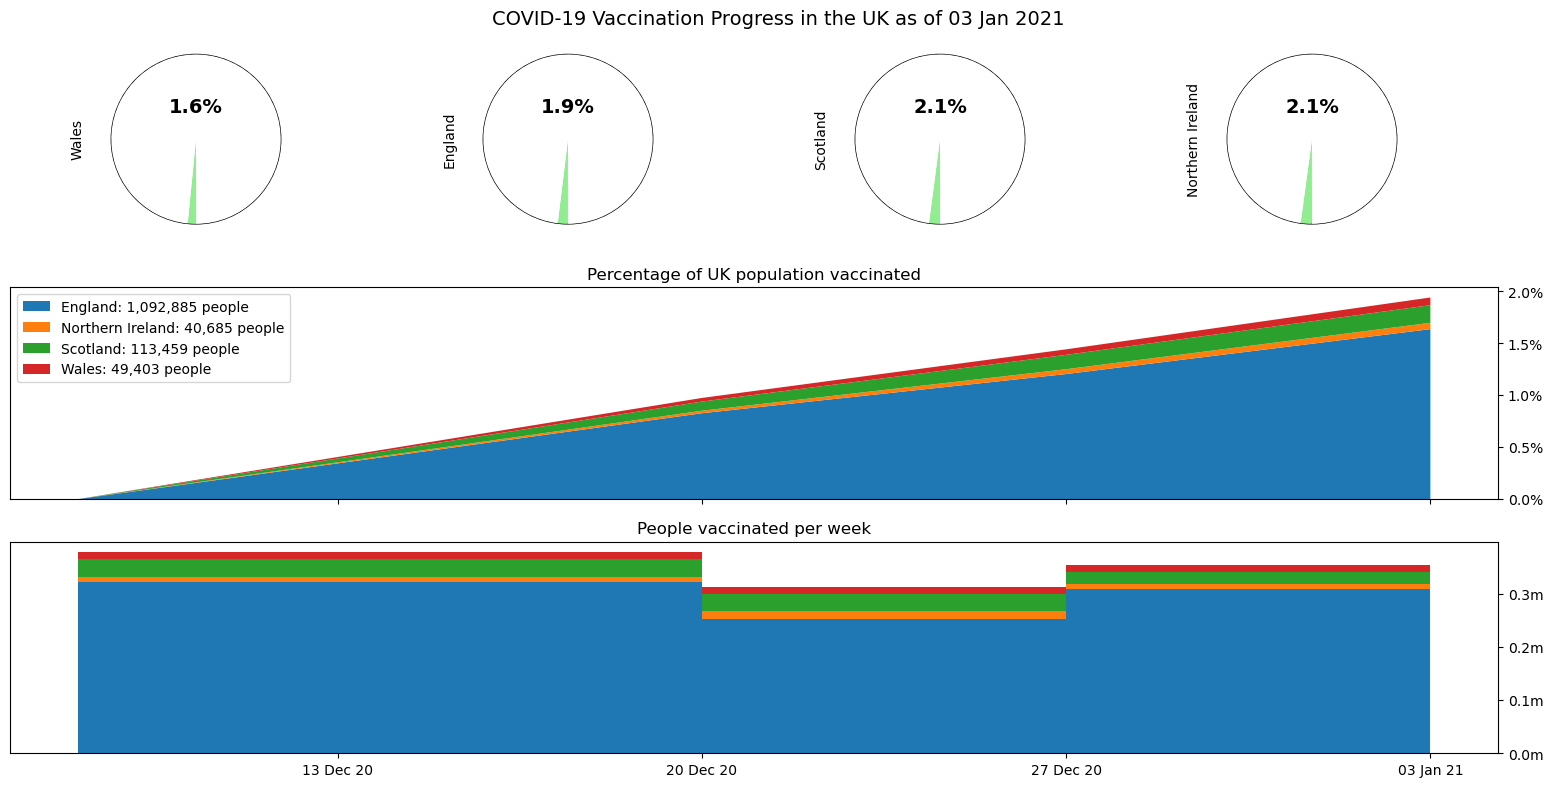

In [2]:
vaccination_dashboard()

In [8]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-01-10.csv')

In [9]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-01-10.csv')

In [10]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-01-10.csv')

In [11]:
if is_msoa_data_ready():
    path = download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, 'release', release=release)
    display(path)
    check_path(path)

today: 2021-01-10, release: 2021-01-10 16:00:03.674433+00:00, msoa: 2021-01-10 16:17:57+00:00


PosixPath('/Users/chris/coronavirus/data/msoa_2021-01-10.csv')